In [58]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', \
           'tab:grey', 'tab:olive', 'tab:cyan', 'lime', 'navy', 'fuchsia', 'm']

## Triadic Census
Note that the triadic census for the groups (such as *Liberal + Libertarian* and *Overall*) were obtained by generating a network with all nodes/edges in the included subreddits; not simply by combining the triadic censes of the individual subreddits.

In [66]:
df = pd.read_csv('results/reddit_reply.csv',index_col=0)
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
print(df)

                                                         003           012  \
Anarchism                                        25566099088      76196181   
Anarcho_Capitalism                               26918538411     151526883   
Anarchy101                                         177929528       1608735   
Conservative                                    130287313352     223525242   
conservatives                                       70388158        492631   
Liberal                                           1952278394       7847156   
Libertarian                                     810924089438     980435790   
politics                                     286317476272647   65768807965   
Republican                                         775785240       3655098   
socialism                                        56601538962     148415024   
Anarchism + Anarcho_Capitalism + Anarchy101     189610736722     461651523   
Conservative + conservatives                    150236958128    

## Triadic Census Plot

<IPython.core.display.Javascript object>


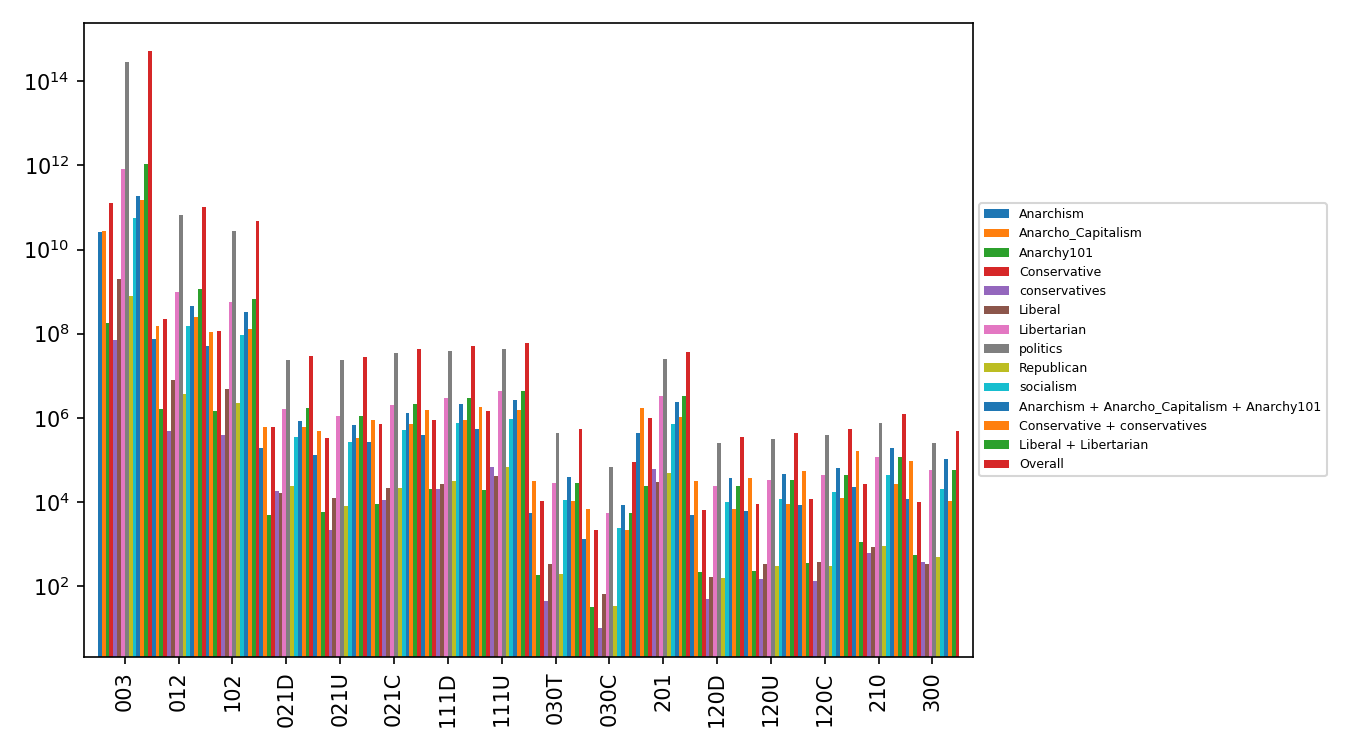

In [67]:
df.transpose().plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,5), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Weighted Average

In [73]:
scaled = df.divide(df.sum(axis=0), axis=1)
print(scaled)
# average = df.divide(df.sum(axis=1), axis=0).dot(dims)
average = scaled.divide(scaled.sum(axis=1), axis=0).dot(dims)
print(average)

                                                      003       012       102  \
Anarchism                                    3.179917e-05  0.000443  0.000627   
Anarcho_Capitalism                           3.348134e-05  0.000881  0.001400   
Anarchy101                                   2.213092e-07  0.000009  0.000018   
Conservative                                 1.620517e-04  0.001300  0.001439   
conservatives                                8.754895e-08  0.000003  0.000005   
Liberal                                      2.428248e-06  0.000046  0.000060   
Libertarian                                  1.008629e-03  0.005701  0.007231   
politics                                     3.561223e-01  0.382405  0.357881   
Republican                                   9.649234e-07  0.000021  0.000028   
socialism                                    7.040112e-05  0.000863  0.001204   
Anarchism + Anarcho_Capitalism + Anarchy101  2.358383e-04  0.002684  0.004175   
Conservative + conservatives

## Weighted Average Plot
Note that the *Overall* weighted average may be similar to the *politics* weighted average in the 3 dimensions because *politics* data makes up a disporportionately large percentage of *Overall* data. Compared to other subreddits, *politics* had by far the most nodes and edges.

<IPython.core.display.Javascript object>


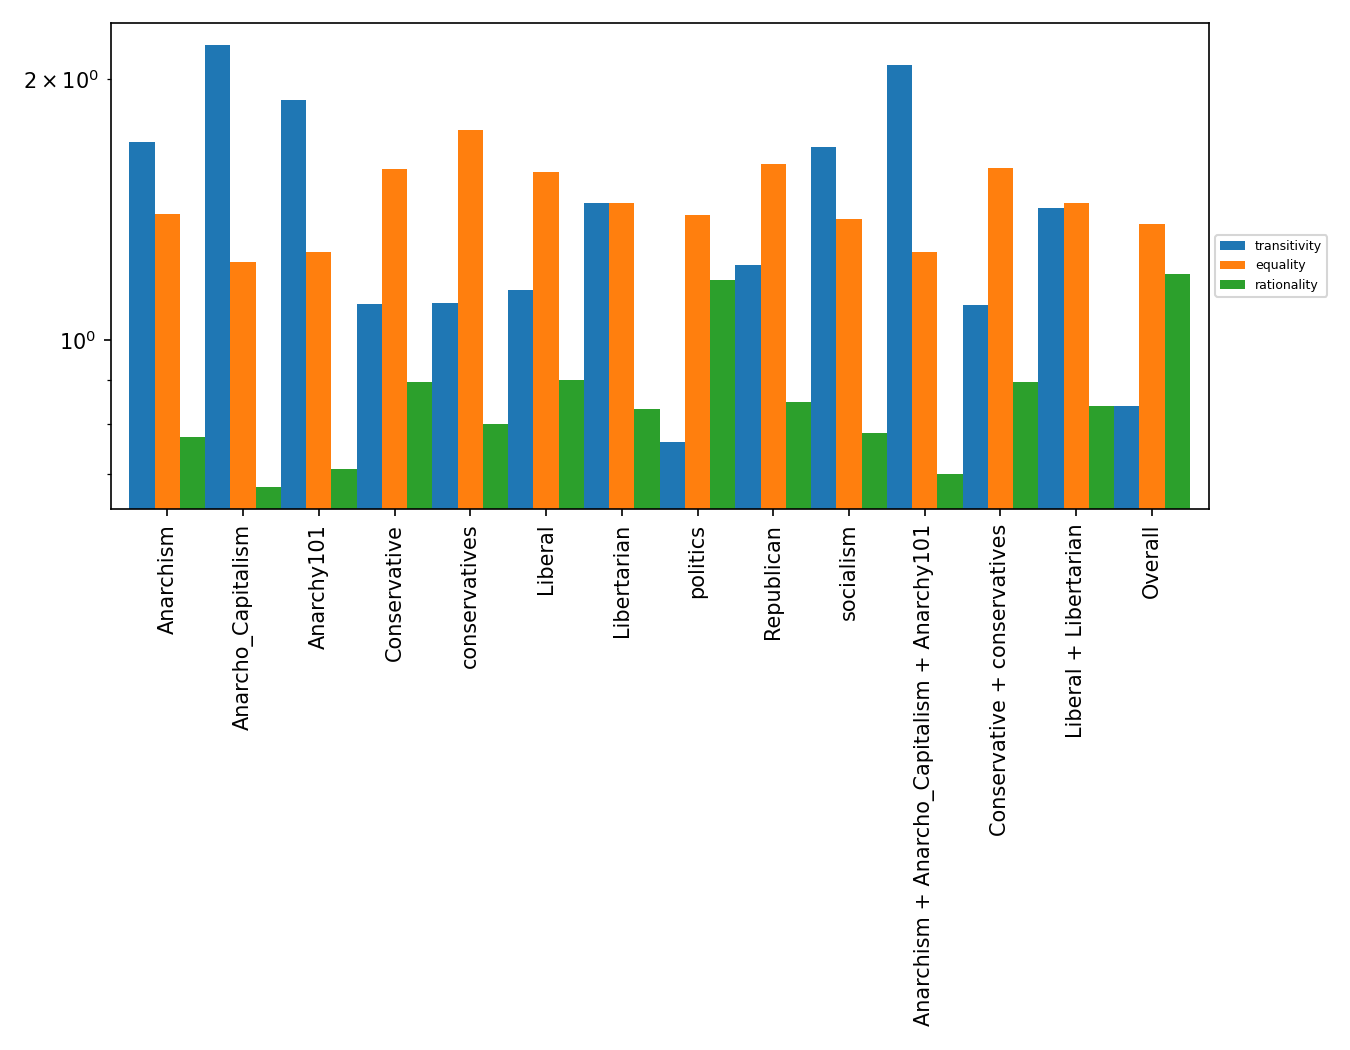

In [74]:
average.plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,7), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


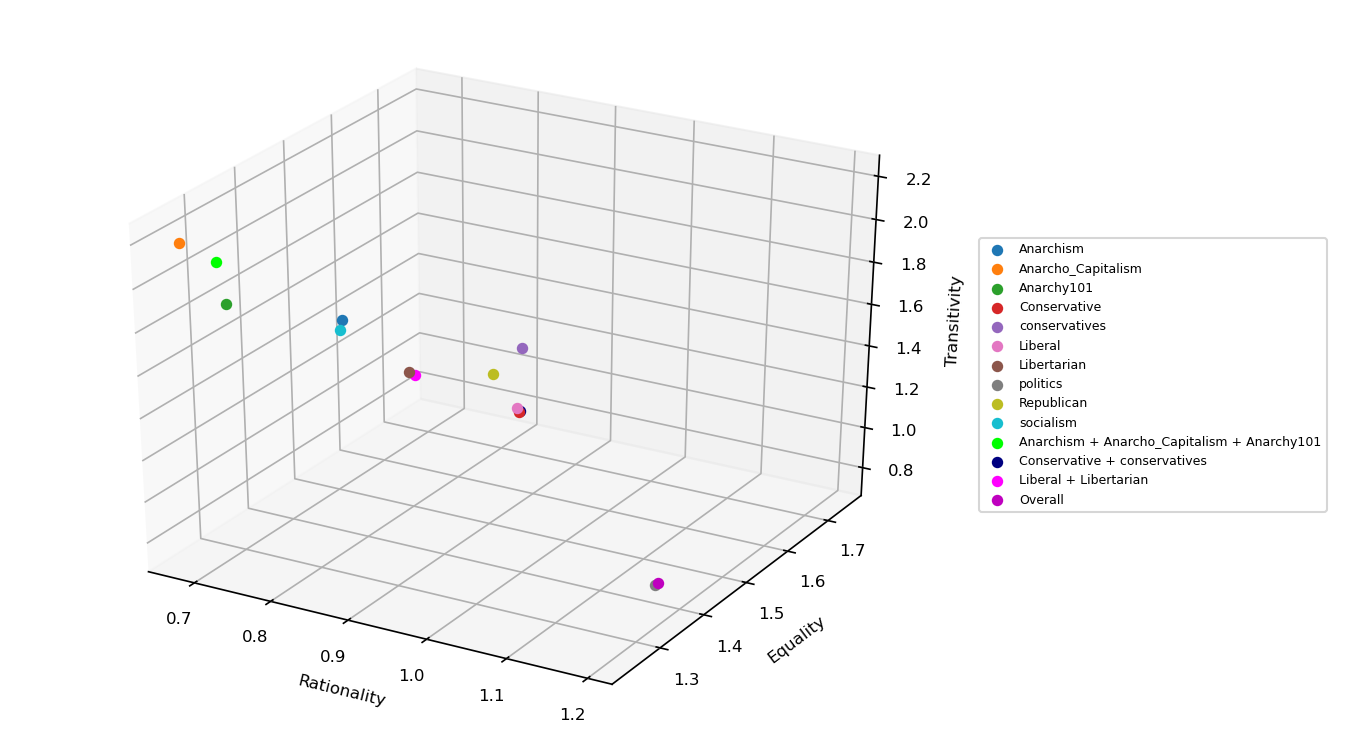

In [75]:
plot = plt.figure(figsize=(9, 5)).gca(projection='3d')
index = 0
for name, row in average.iterrows():
    plot.scatter(row['rationality'], row['equality'], row['transitivity'], label=name, c=colours[index])
    index += 1
plot.set_xlabel('Rationality', fontsize=8)
plot.set_ylabel('Equality', fontsize=8)
plot.set_zlabel('Transitivity', fontsize=8)
plot.tick_params(axis='both', labelsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Notes

* Todo: statistical significane (p-value)
* Dataset: William L. Hamilton*, Justine Zhang*, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky, Jure Leskovec. Loyalty in Online Communities. (Currently under review at WWW 2017). *Equal contribution. http://snap.stanford.edu/data/web-RedditNetworks.html